In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Linear Regression

In [3]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in this class


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

Let's look at an example where our data is linearly correlated

In [4]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


`example` is a table of 1k examples where `x` and `y` have a correlation coefficient of 0.99



**Question:** How could we visualize the correlation?

<details>
<summary>Solution</summary>
  example.scatter('x', 'y')
</details>

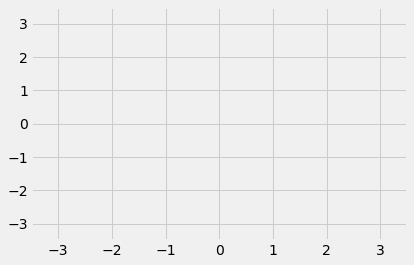

In [5]:
...
resize_window()

Let's now make our predictions

In [6]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))

**Question:** What should our `y` value be when `x` is 0?

In [7]:
nn_prediction_example(0)

0.006236760779085388

**Question** What about when `x` is 2 or -2?

In [8]:
nn_prediction_example(2.5), nn_prediction_example(-3)

(2.4383239070962976, -3.135531435646115)

Now let's apply the prediction function to our table

In [9]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

Let's plot the predictions (in yellow)

In [ ]:
example.scatter('x')
resize_window()

In [ ]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

Now let's make a new table where the data is not linearly correlated

In [ ]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [ ]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=0, color='dodgerblue')
resize_window()

Now let's look at an example where the scatter plot is oval shaped

In [ ]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

(back to slides)

# Linear regression: defining the line


In [10]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

**Question:** let's compute the slope and intercept

<details>
<summary>Equation</summary>
  ![image.png](slope_intercept_eq.png)
</details>


<!-- copy the equation markdown to this cell and change the cell to markdown -->
(put equation here)

In [ ]:
def slope(t, x, y):
    

def intercept(t, x, y):
    return 

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

(back to slides)
# Galton Data

In [11]:

galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [13]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where(
        'MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

Let's now use the function to add a new column called "Average neighbor prediction"

<details>
<summary>Solution</summary>
  eights.apply(nn_prediction_galton, 'MidParent')
</details>


In [15]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', 
    ...)
heights_with_predictions

MidParent,Child,Average neighbor prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


Now let's find the slope and intercept

<details>
<summary>Solution</summary>
  slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
</details>


In [16]:

galton_slope = ...
galton_intercept = ...
galton_slope, galton_intercept

NameError: name 'slope' is not defined

In [17]:
heights.take(123)

MidParent,Child
69.48,71.5


Let's make a prediction for the height of these parents' children.

Remember we stored the predictions in `heights_with_predictions` table

<details>
<summary>Solution</summary>
  heights_with_predictions.where('MidParent', are.equal_to(69.48))
</details>


Let's look at all the predictions

In [18]:

heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

NameError: name 'galton_slope' is not defined

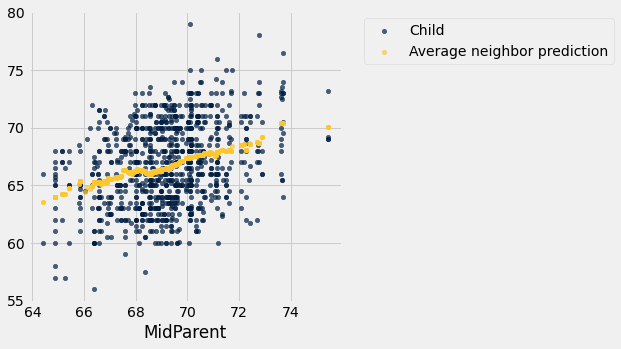

In [19]:
heights_with_predictions.scatter('MidParent')



## Regression line vs other lines

In [22]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [23]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


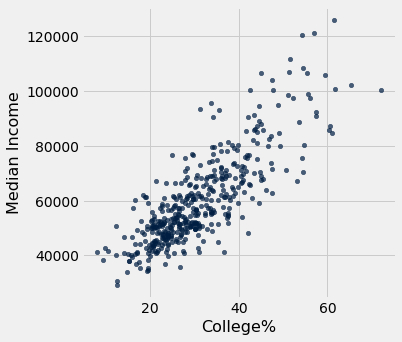

In [25]:
demographics.scatter('College%', 'Median Income')

In [26]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [ ]:
Lets find the regression slope and intercept for College% and Median Incomes

<details>
<summary>Solution</summary>
  regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
</details>

In [27]:
regression_slope = ...
regression_intercept = ...
regression_slope, regression_intercept

(Ellipsis, Ellipsis)

In [20]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [21]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

Now lets make predicts

In [28]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

NameError: name 'slope' is not defined

In [29]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

NameError: name 'predicted' is not defined

Now lets look at our errors

In [30]:

actual = demographics.column('Median Income')
errors = actual - predicted

NameError: name 'predicted' is not defined

Let's add the errors to our table

<details>
<summary>Solution</summary>
 demographics.with_column('Error', errors)
</details>


In [33]:
...
demographics

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3
61413,36.7
34664,19.4
76440,29.6
50537,24.5
49072,34


What was our typical error?

In [ ]:
np.mean(errors)

In [34]:
np.mean(errors ** 2) ** 0.5

NameError: name 'errors' is not defined

Let's look at our errors

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'int'

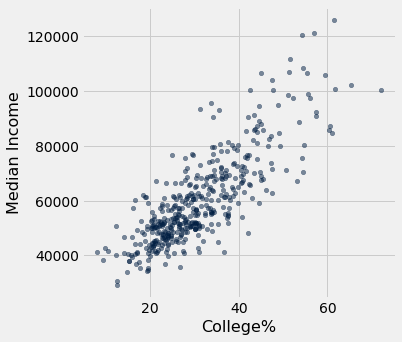

In [35]:
demographics_errors(regression_slope, regression_intercept)


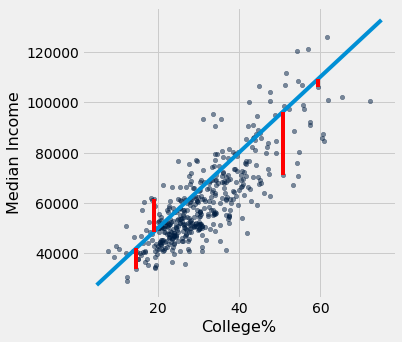

In [36]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

(back to slides)
# Root Mean Square Error

In [38]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 30247.88


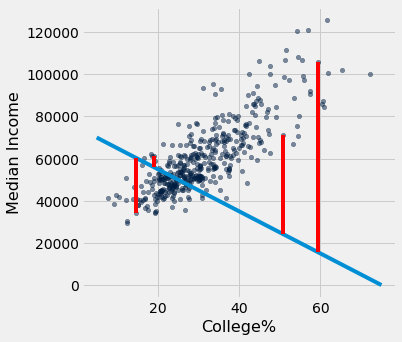

In [39]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


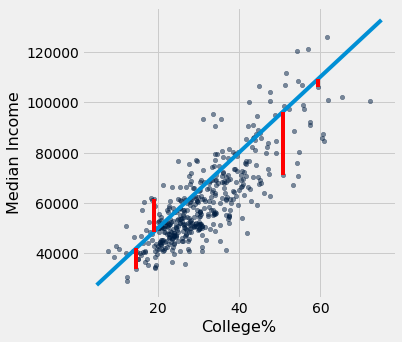

In [40]:
show_demographics_rmse(1500, 20000)

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'int'

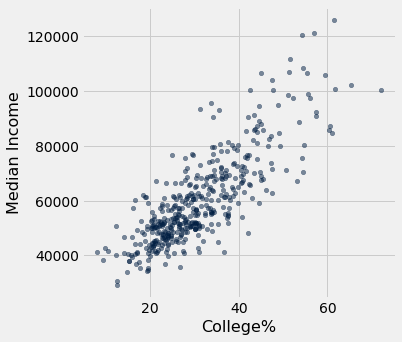

In [41]:
show_demographics_rmse(regression_slope, regression_intercept)



# Numerical Optimization

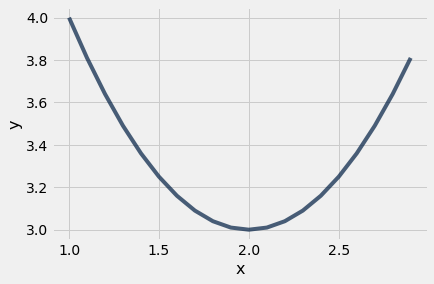

In [42]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [43]:
def f(x):
    return ((x-2)**2) + 3

What x-value gives us the smalles y-value?

In [44]:
minimize(f)

1.9999999946252267

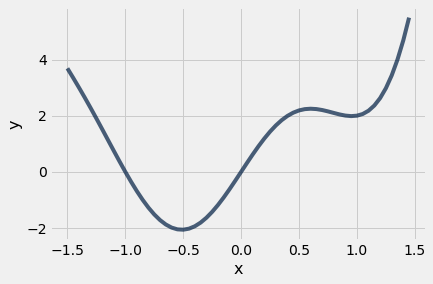

In [45]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [46]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4

What x-value gives us the smalles y-value?

In [47]:
minmize(...)

NameError: name 'minmize' is not defined

(back to slides)
# Minimizing RMSE


In [48]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [49]:
demographics_rmse(1500, 20000)

11559.086490075999

In [50]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [51]:
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

In [52]:
make_array(regression_slope, regression_intercept)


array([Ellipsis, Ellipsis], dtype=object)

# Nonlinear Regression


In [53]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8
